# Dask Array

Материалы:
* Макрушин С.В. Лекция 11: Dask
* https://docs.dask.org/en/latest/array.html
* JESSE C. DANIEL. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Создайте массив размерностью 1000 на 300000, заполненный числами из стандартного нормального распределения. Исследуйте основные характеристики полученного массива.

In [5]:
import dask.array as da

x = da.random.standard_normal((1000, 300000))
print("shape:", x.shape)
print("dtype:", x.dtype)
print("chunks:", x.chunks)
print("size:", x.size)

shape: (1000, 300000)
dtype: float64
chunks: ((1000,), (16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 16777, 14791))
size: 300000000


2. Посчитайте сумму квадратов элементов массива, созданного в задаче 1. Создайте массив `np.array` такого же размера и сравните скорость решения задачи с использование `da.array` и `np.array`

In [6]:
import time
import numpy as np

start_time = time.time()
dask_sum_of_squares = (x ** 2).sum().compute()
dask_time = time.time() - start_time
print("Сумма квадратов даска:", dask_sum_of_squares)
print("Затрачено времени:", dask_time)

y = np.random.standard_normal((1000, 300000))

start_time = time.time()
numpy_sum_of_squares = (y ** 2).sum()
numpy_time = time.time() - start_time
print("Сумма квадратов нампай массива:", numpy_sum_of_squares)
print("Затрачено времени:", numpy_time)

Сумма квадратов даска: 300010195.09155947
Затрачено времени: 3.128268003463745
Сумма квадратов нампай массива: 299998502.42980915
Затрачено времени: 1.901726484298706


3. Визуализируйте граф вычислений для задачи 12.

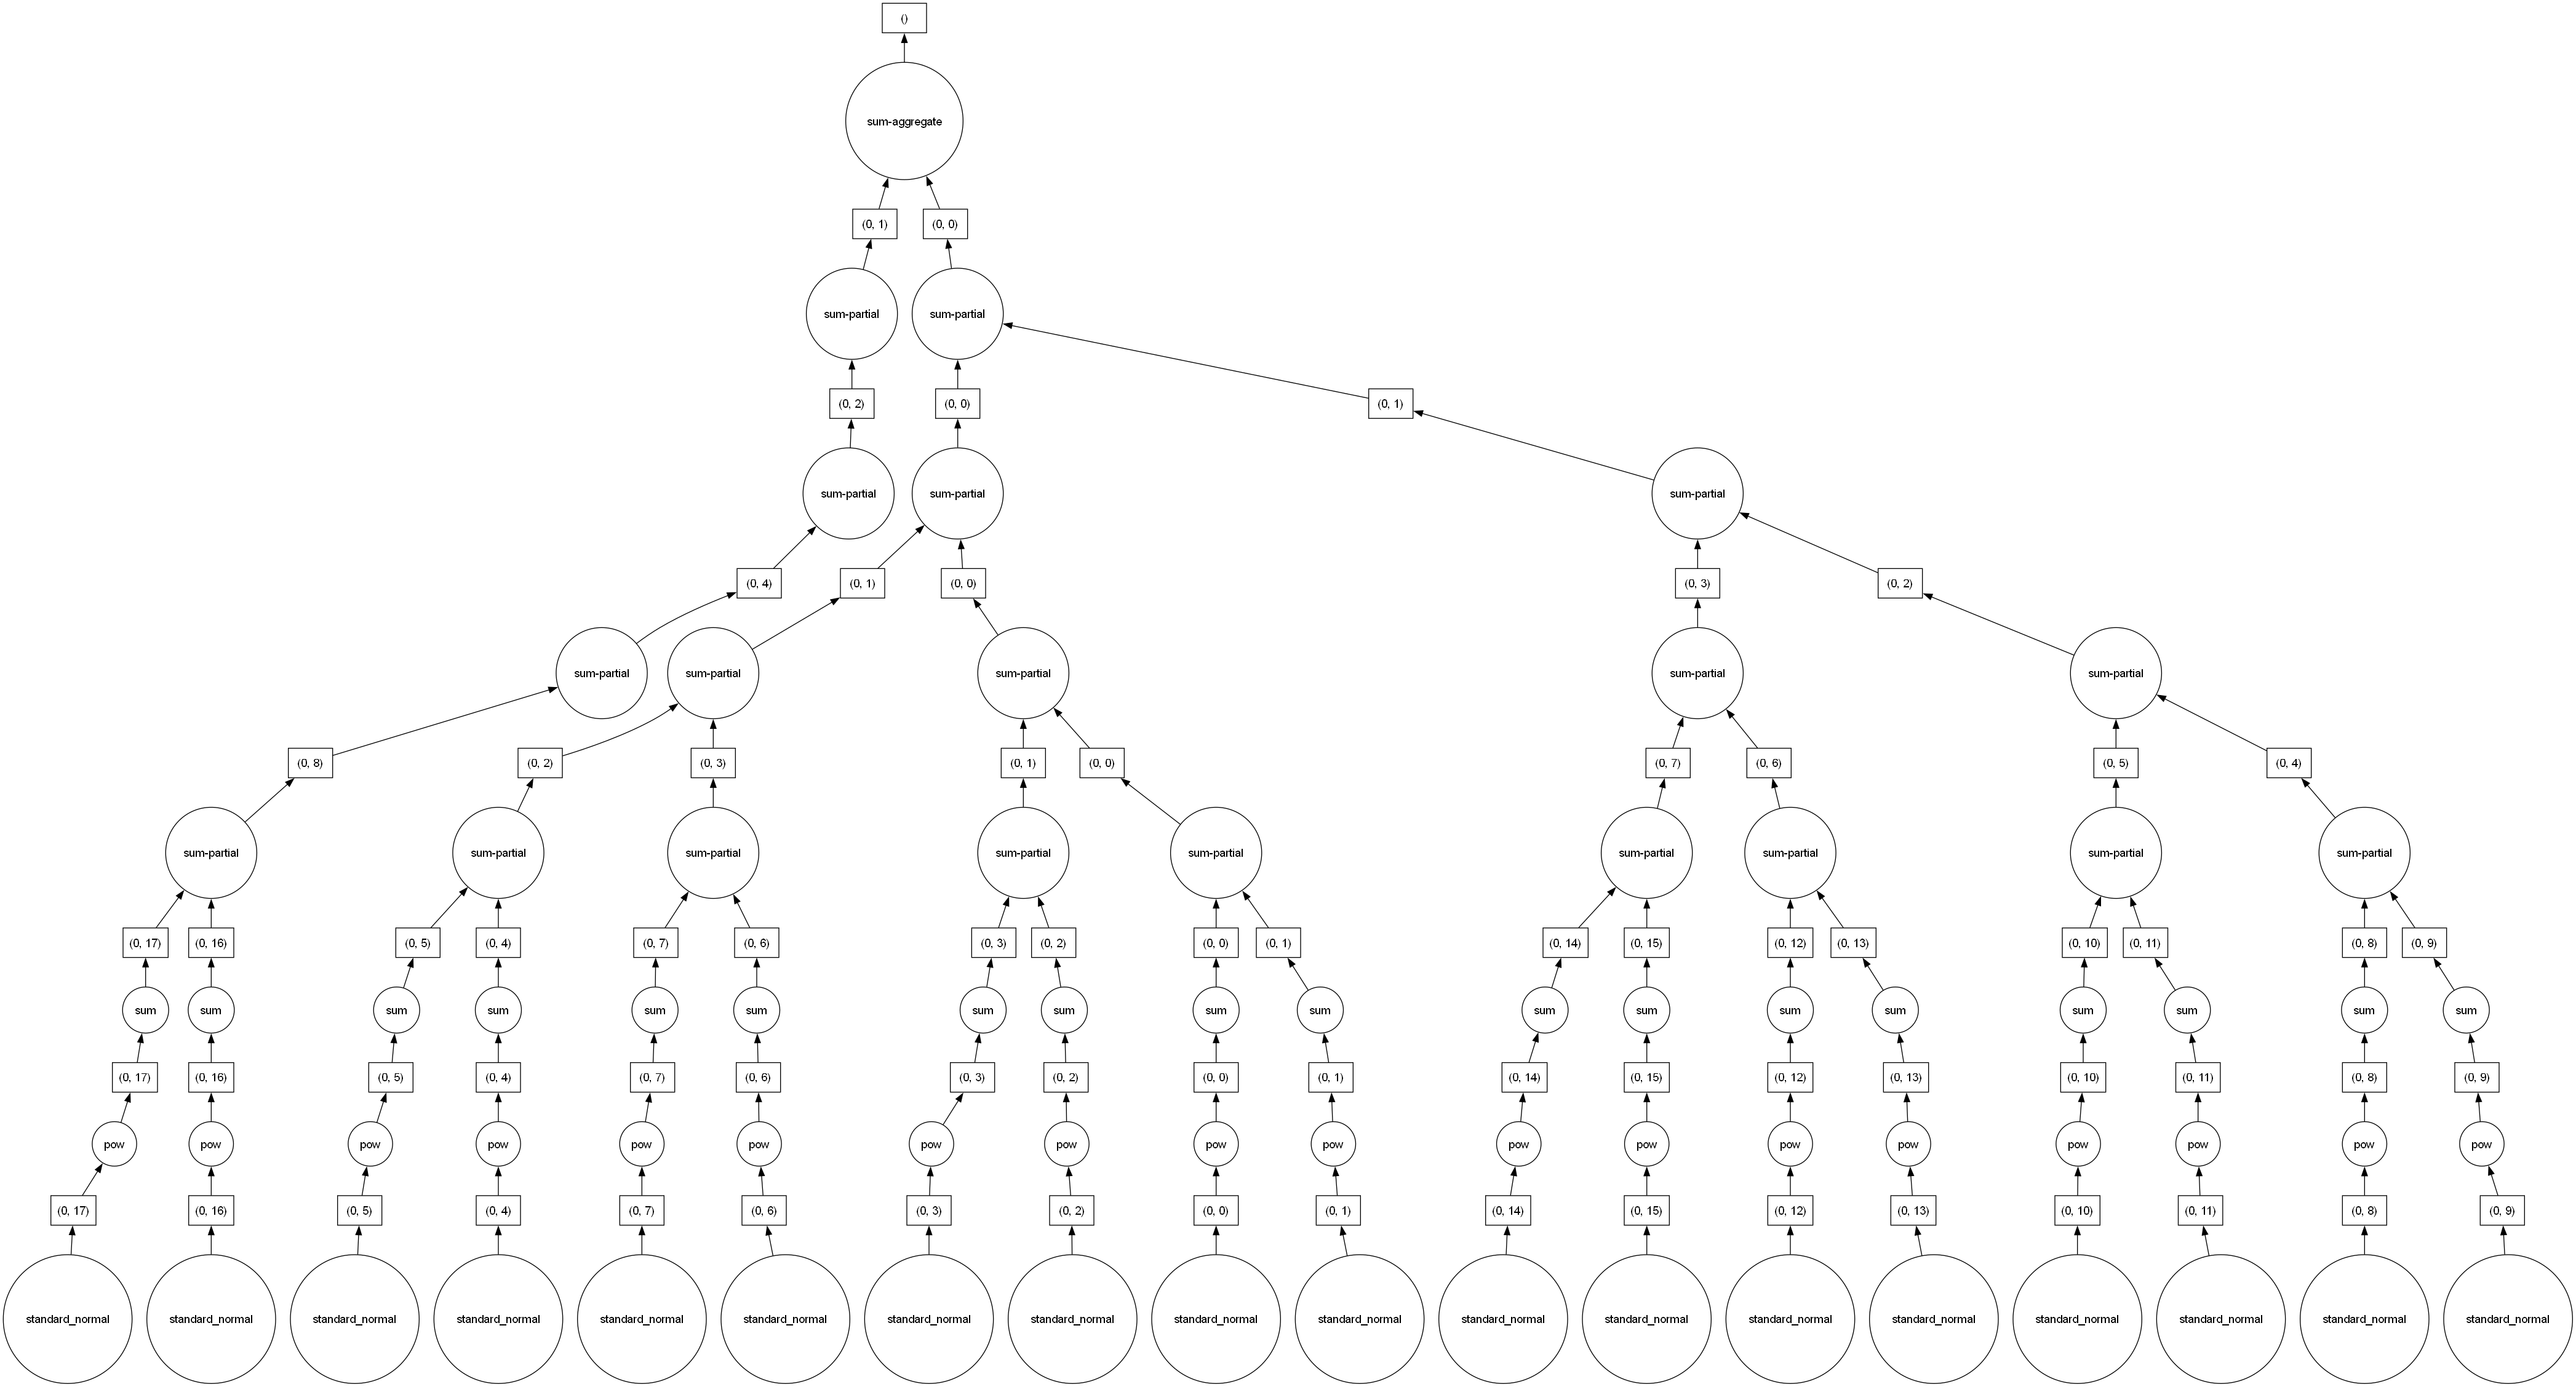

In [7]:
(x ** 2).sum().visualize()

## Лабораторная работа 11

In [8]:
import dask.array as da
import h5py
import numpy as np
import csv
import pandas as pd
import time
import dask.dataframe as dd

1. Считайте датасет `recipe` из файла `minutes_n_ingredients_full.hdf5` в виде `dask.array`. Укажите аргумент `chunks=(100_000, 3)` при создании массива. Выведите на экран основную информацию о массиве.

In [9]:
df = pd.read_csv("recipes_full.csv", usecols=['id', 'minutes', 'n_ingredients'])

df.to_hdf("minutes_n_ingredients_full.hdf5", key='recipe', mode='w', format='table')

In [ ]:

df = pd.read_hdf("minutes_n_ingredients_full.hdf5", key='recipe')
data = df.values

recipe_array = da.from_array(data, chunks=(100000, 3))

print("shape:", recipe_array.shape)
print("dtype:", recipe_array.dtype)
print("chunks:", recipe_array.chunks)
print("Количество чанков:", recipe_array.npartitions)


shape: (2231637, 3)
dtype: int64
chunks: ((100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 31637), (3,))
Количество чанков: 23


2. Вычислите среднее значение по каждому столбцу, кроме первого. 

In [11]:
numeric_columns = recipe_array[:, 1:]
mean_values = da.nanmean(numeric_columns, axis=0).compute()
print("Среднее количество минут:", mean_values[0])
print("Среднее количество ингредиентов:", mean_values[1])

Среднее количество минут: 1004.2080517575215
Среднее количество ингредиентов: 5.419800800936711


3. Исследуйте, как влияет значение аргумента `chunks` при создании `dask.array` на скорость выполнения операции поиска среднего. 

In [12]:

df = pd.read_hdf("minutes_n_ingredients_full.hdf5", key='recipe')
data = df[['minutes', 'n_ingredients']].values.astype('float64')

chunk_sizes = [1000, 10000, 50000, 100000, 200000, 500000, 1000000]
results = [] 

for chunk_size in chunk_sizes:
    print(f"При chunks=({chunk_size}, 2)")
    arr = da.from_array(data, chunks=(chunk_size, 2)) 
    start = time.perf_counter()
    mean_vals = da.nanmean(arr, axis=0).compute()
    elapsed = time.perf_counter() - start

    n_chunks = arr.npartitions
    results.append({
        'chunk_size': chunk_size,
        'n_chunks': n_chunks,
        'time_sec': elapsed,
        'mean_minutes': mean_vals[0],
        'mean_n_ingredients': mean_vals[1] 
    })

    print("Время:", elapsed, "  Кол-во чанков:" ,n_chunks)
    print("Среднее minutes:", mean_vals[0], " Среднее n_ingredients:", mean_vals[1])
    print()

При chunks=(1000, 2)
Время: 1.1486960000002   Кол-во чанков: 2232
Среднее minutes: 1004.2080517575215  Среднее n_ingredients: 5.419800800936711

При chunks=(10000, 2)
Время: 0.21957889999976032   Кол-во чанков: 224
Среднее minutes: 1004.2080517575215  Среднее n_ingredients: 5.419800800936711

При chunks=(50000, 2)
Время: 0.046770199998718454   Кол-во чанков: 45
Среднее minutes: 1004.2080517575215  Среднее n_ingredients: 5.419800800936711

При chunks=(100000, 2)
Время: 0.048647400002664654   Кол-во чанков: 23
Среднее minutes: 1004.2080517575215  Среднее n_ingredients: 5.419800800936711

При chunks=(200000, 2)
Время: 0.04894620000050054   Кол-во чанков: 12
Среднее minutes: 1004.2080517575215  Среднее n_ingredients: 5.419800800936711

При chunks=(500000, 2)
Время: 0.045927800001663854   Кол-во чанков: 5
Среднее minutes: 1004.2080517575215  Среднее n_ingredients: 5.419800800936711

При chunks=(1000000, 2)
Время: 0.0595290000019304   Кол-во чанков: 3
Среднее minutes: 1004.2080517575215  Сре

4. Выберите рецепты, время выполнения которых меньше медианного значения

In [18]:

median_minutes = da.nanmedian(numeric_columns[:, 0], axis = 0).compute()
print("Медианное время выполнения:", median_minutes)

mask = numeric_columns[:, 0] < median_minutes 
filtered_recipes = numeric_columns[mask] 
filtered_recipes = filtered_recipes.compute_chunk_sizes() 

n_filtered = filtered_recipes.shape[0]
print("Кол-во рецептов со временем меньше медианы:", n_filtered)
sample = filtered_recipes[:5].compute()
sample

Медианное время выполнения: 32.0
Кол-во рецептов со временем меньше медианы: 1084304


array([[23,  5],
       [ 0,  5],
       [24,  1],
       [29,  5],
       [21,  5]])

5. Посчитайте количество каждого из возможных значений кол-ва ингредиентов

In [14]:
df = pd.read_hdf("minutes_n_ingredients_full.hdf5", key='recipe')
array_data = df['n_ingredients'].values
ddf = dd.from_array(array_data, columns=['n_ingredients'], chunksize=10000)
ddf_clean = ddf.dropna(subset=['n_ingredients'])
value_counts = ddf_clean['n_ingredients'].value_counts().compute().sort_index() 

for n_ing, count in value_counts.items():
    print(f"{int(n_ing)} ингредиентов - {count} рецептов")

1 ингредиентов - 222071 рецептов
2 ингредиентов - 224158 рецептов
3 ингредиентов - 229388 рецептов
4 ингредиентов - 234948 рецептов
5 ингредиентов - 240720 рецептов
6 ингредиентов - 244360 рецептов
7 ингредиентов - 247181 рецептов
8 ингредиентов - 246747 рецептов
9 ингредиентов - 246816 рецептов
10 ингредиентов - 22430 рецептов
11 ингредиентов - 19094 рецептов
12 ингредиентов - 15165 рецептов
13 ингредиентов - 11640 рецептов
14 ингредиентов - 8284 рецептов
15 ингредиентов - 6014 рецептов
16 ингредиентов - 4145 рецептов
17 ингредиентов - 2793 рецептов
18 ингредиентов - 1913 рецептов
19 ингредиентов - 1279 рецептов
20 ингредиентов - 852 рецептов
21 ингредиентов - 529 рецептов
22 ингредиентов - 346 рецептов
23 ингредиентов - 244 рецептов
24 ингредиентов - 178 рецептов
25 ингредиентов - 107 рецептов
26 ингредиентов - 68 рецептов
27 ингредиентов - 55 рецептов
28 ингредиентов - 33 рецептов
29 ингредиентов - 22 рецептов
30 ингредиентов - 20 рецептов
31 ингредиентов - 13 рецептов
32 ингредиент

6. Найдите максимальную продолжительность рецепта. Ограничьте максимальную продолжительность рецептов сверху значением, равному 75% квантилю.

In [15]:
df = pd.read_hdf("minutes_n_ingredients_full.hdf5", key='recipe')
columns_to_use = ['minutes', 'n_ingredients']

array_data = df[columns_to_use].values
ddf = dd.from_array(array_data, 
                   columns=columns_to_use, 
                   chunksize=len(df)//8)

max_minutes = ddf['minutes'].max().compute()
print("Текущий максимум продолжительности рецепта:", max_minutes)

q75 = ddf['minutes'].quantile(0.75).compute()
print("75% квантиль:", q75)

ddf_clipped = ddf.copy()
ddf_clipped['minutes'] = ddf['minutes'].clip(upper=q75)

new_max = ddf_clipped['minutes'].max().compute()
print("Новый максимум после ограничения:", new_max)
ddf_clipped.head(5)

Текущий максимум продолжительности рецепта: 2147483647
75% квантиль: 60.0
Новый максимум после ограничения: 60


,minutes,n_ingredients
0,33,9
1,23,5
2,0,5
3,24,1
4,47,10


7. Создайте массив `dask.array` из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле $L_1$) рецепт из имеющихся в датасете.

In [16]:
preferences = da.from_array(np.array([20.0, 5.0]), chunks=(2,))
print("Предпочтения:", preferences.compute())

df = pd.read_hdf("minutes_n_ingredients_full.hdf5", key='recipe')
columns_to_use = ['minutes', 'n_ingredients']

array_data = df[columns_to_use].values
ddf = dd.from_array(array_data, 
                   columns=columns_to_use, 
                   chunksize=len(df)//8)
dataset = ddf.to_dask_array(lengths=True)

mask_no_nan = ~da.isnan(dataset).any(axis=1) 
dataset_clean = dataset[mask_no_nan]
dataset_clean = dataset_clean.compute_chunk_sizes() 

abs_diff = da.abs(dataset_clean - preferences)
l1_distances = abs_diff.sum(axis=1)

idx_min = da.argmin(l1_distances).compute()
min_distance = l1_distances[idx_min].compute()
best_recipe = dataset_clean[idx_min].compute()

print("Индекс самого похожего рецепта:", idx_min)
print("Минимальное L1-расстояние:", min_distance)
print("Параметры найденного рецепта: minutes=", best_recipe[0], "  n_ingredients=", int(best_recipe[1]))

Предпочтения: [20.  5.]
Индекс самого похожего рецепта: 617
Минимальное L1-расстояние: 0.0
Параметры найденного рецепта: minutes= 20   n_ingredients= 5


8. Работая с исходным файлом в формате `hdf5`, реализуйте алгоритм подсчета среднего значения в блочной форме и вычислите с его помощью среднее значение второго столбца в массиве.

Блочный алгоритм вычислений состоит из двух частей:
1. Загрузка фрагмента за фрагментом данных по `blocksize` элементов и проведение вычислений на этим фрагментом
2. Агрегация результатов вычислений на различных фрагментах для получения результата на уровне всего набора данных

Важно: при работе с `h5py` в память загружаются не все элементы, а только те, которые запрашиваются в данный момент

In [17]:
def compute_mean_blockwise_hdf5(filename, dataset_name, column_index=1, blocksize=100_000):
    total_sum = 0.0
    total_count = 0

    df_meta = pd.read_hdf(filename, key=dataset_name, stop=0)  
    total_rows = len(pd.read_hdf(filename, key=dataset_name, columns=[]))

    print("Всего строк:", total_rows)
    print("Размер блока:", blocksize)

    with h5py.File(filename, 'r') as f:
        if isinstance(f[dataset_name], h5py.Group):
            for start in range(0, total_rows, blocksize): 
                end = min(start + blocksize, total_rows)
                print(f"Обработка строк [{start}:{end}]")

                
                block_df = pd.read_hdf(filename, key=dataset_name, start=start, stop=end, columns=[df_meta.columns[column_index]])
                block = block_df.iloc[:, 0].values  
                mask = np.isfinite(block) 
                clean_block = block[mask]

                total_sum += np.sum(clean_block)
                total_count += len(clean_block)

        else:
            dataset = f[dataset_name] 
            for start in range(0, total_rows, blocksize):
                end = min(start + blocksize, total_rows)
                print(f"Обработка строк [{start}:{end}]")

                block = dataset[start:end, column_index]
                mask = np.isfinite(block)
                clean_block = block[mask]

                total_sum += np.sum(clean_block)
                total_count += len(clean_block)

    overall_mean = total_sum / total_count
    print("Общее кол-во элементов:", total_count)
    print(f"Среднее значение по столбцу {column_index}: {overall_mean:.4f}")
    return overall_mean


if __name__ == "__main__":
    mean_n_ingredients = compute_mean_blockwise_hdf5(
        filename="minutes_n_ingredients_full.hdf5",
        dataset_name="recipe",
        column_index=1,  
        blocksize=100000
    )

Всего строк: 2231637
Размер блока: 100000
Обработка строк [0:100000]
Обработка строк [100000:200000]
Обработка строк [200000:300000]
Обработка строк [300000:400000]
Обработка строк [400000:500000]
Обработка строк [500000:600000]
Обработка строк [600000:700000]
Обработка строк [700000:800000]
Обработка строк [800000:900000]
Обработка строк [900000:1000000]
Обработка строк [1000000:1100000]
Обработка строк [1100000:1200000]
Обработка строк [1200000:1300000]
Обработка строк [1300000:1400000]
Обработка строк [1400000:1500000]
Обработка строк [1500000:1600000]
Обработка строк [1600000:1700000]
Обработка строк [1700000:1800000]
Обработка строк [1800000:1900000]
Обработка строк [1900000:2000000]
Обработка строк [2000000:2100000]
Обработка строк [2100000:2200000]
Обработка строк [2200000:2231637]
Общее кол-во элементов: 2231637
Среднее значение по столбцу 1: 1004.2081
